We have used Amazon stock price from "1998-01-01" to "2020-10-01" .
Source : Yahoo Finance.
The ticker and date range can be changed in the code manually.
Here are the list of models we have used
1. Linear-Regression Algorithm
2. Logistic-Regression Algorithm
3. K-Nearest-Neighbors Algorithm
4. Support-Vector-Machine Algorithm
5. Long Term-Short Memory 
6. Auto-ARIMA



In [ ]:
pip install yfinance

     |████████████████████████████████| 6.3 MB 35.1 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23919 sha256=d826778214d65764fd538c3deb41d71759dd0b54fa08563bcff29e4124fb1b45
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import pandas as pd
import numpy as np
#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

import yfinance as yf

msft = yf.Ticker("AMZN")

# get historical market data

df = msft.history(start = "1998-01-01",end = "2020-10-01")

df.to_csv('stock_Price.csv')

In [ ]:
df.dropna(axis=0, inplace=True)

In [ ]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1998-01-02,5.000000,5.000000,4.796875,4.958333,1660800,0,0.0
1998-01-05,4.885417,4.937500,4.708333,4.750000,3590400,0,0.0
1998-01-06,4.697917,4.875000,4.666667,4.838542,4174800,0,0.0
1998-01-07,4.833333,4.833333,4.692708,4.781250,2725200,0,0.0
1998-01-08,4.697917,4.703125,4.531250,4.614583,6015600,0,0.0
...,...,...,...,...,...,...,...
2020-09-24,2977.790039,3069.300049,2965.000000,3019.790039,5529400,0,0.0
2020-09-25,3054.860107,3101.540039,2999.000000,3095.129883,4615200,0,0.0
2020-09-28,3148.850098,3175.040039,3117.169922,3174.050049,4224200,0,0.0


In [ ]:
df.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [ ]:
print('Shape of the data:')
print(df.shape)

Shape of the data:
(5724, 7)


In [ ]:
df['Date'] = pd.to_datetime(df.index,format='%Y-%m-%d')
df.index = df['Date']

In [ ]:
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

In [ ]:
for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]

In [ ]:
new_data.shape

(5724, 2)

In [ ]:
split = round(0.7*len(new_data))
valid = new_data[split:]
train = new_data[:split]

In [ ]:
print('Shape of training set:')
print(train.shape)

Shape of training set:
(4007, 2)


In [ ]:

print('Shape of validation set:')
print(valid.shape)

Shape of validation set:
(1717, 2)


In [ ]:
valid.head()

,Date,Close
4007,2013-12-05 00:00:00,384.49
4008,2013-12-06 00:00:00,386.95
4009,2013-12-09 00:00:00,384.89
4010,2013-12-10 00:00:00,387.78
4011,2013-12-11 00:00:00,382.19


In [ ]:
preds = []
for i in range(0,valid.shape[0]):
    a = valid['Close'][len(valid)-split+i:].sum() + sum(preds)
    b = a/split
    preds.append(b)

In [ ]:
MA_rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))
print('\n RMSE value on validation set:')
print(MA_rms)


 RMSE value on validation set:
933.3739145507287


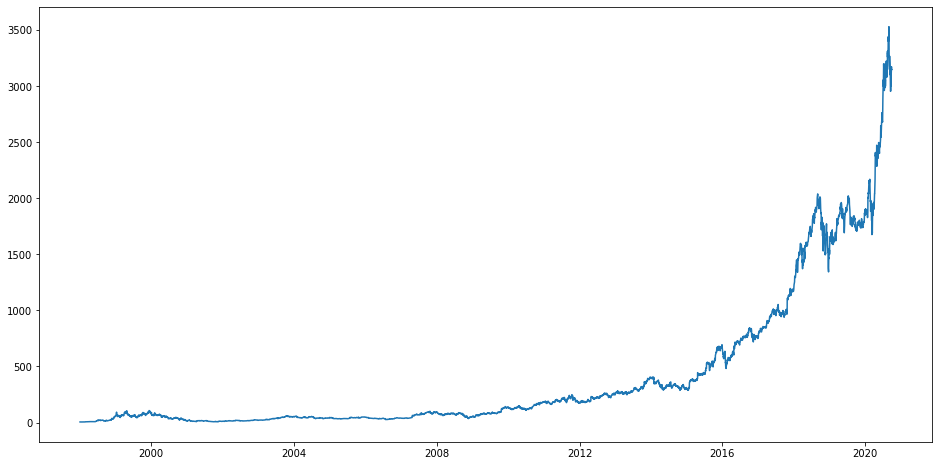

In [ ]:
#setting index as date
import matplotlib.pyplot as plt
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


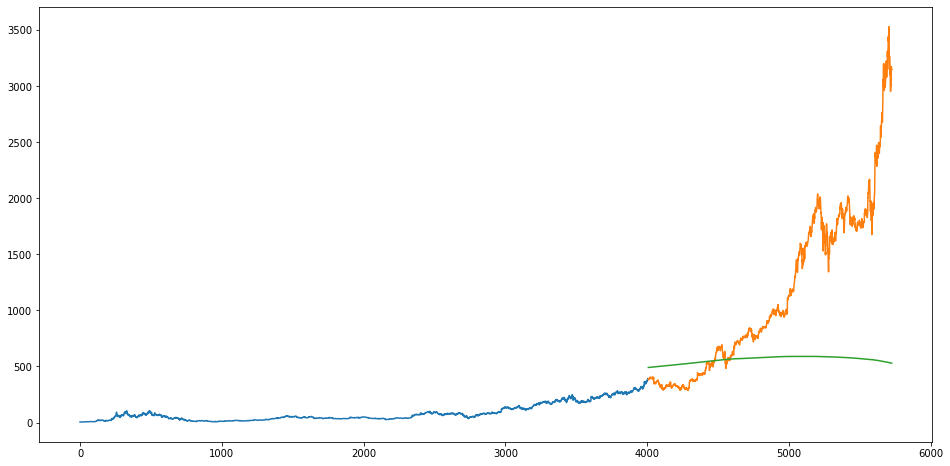

In [ ]:
#plot
plt.figure(figsize=(16,8))
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

In [ ]:
#setting index as date values
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#sorting
data = df.sort_index(ascending=True, axis=0)

#creating a separate dataset
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]


In [ ]:
!pip install fastai

In [ ]:
pip install torch==1.4.0

     |████████████████████████████████| 753.4MB 19kB/s 
ERROR: torchvision 0.8.1+cu101 has requirement torch==1.7.0, but you'll have torch 1.4.0 which is incompatible.
  Found existing installation: torch 1.7.0+cu101
    Uninstalling torch-1.7.0+cu101:
      Successfully uninstalled torch-1.7.0+cu101


In [ ]:
from fastai.tabular import add_datepart


In [ ]:
add_datepart(new_data, 'Date')
new_data.drop('Elapsed', axis=1, inplace=True)  #elapsed will be the time stamp

/usr/local/lib/python3.6/dist-packages/fastai/tabular/transform.py:63: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  for n in attr: df[prefix + n] = getattr(field.dt, n.lower())


In [ ]:
new_data['mon_fri'] = 0
for i in range(0,len(new_data)):
    if (new_data['Dayofweek'][i] == 0 or new_data['Dayofweek'][i] == 4):
        new_data['mon_fri'][i] = 1
    else:
        new_data['mon_fri'][i] = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## IMPLEMENTATION OF LINEAR REGRESSION

In [ ]:
train = new_data[:split]
valid = new_data[split:]

x_train = train.drop('Close', axis=1)
y_train = train['Close']
x_valid = valid.drop('Close', axis=1)
y_valid = valid['Close']

#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#make predictions and find the rmse
preds = model.predict(x_valid)
Linearregressionrms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
Linearregressionrms

1148.907509370698

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


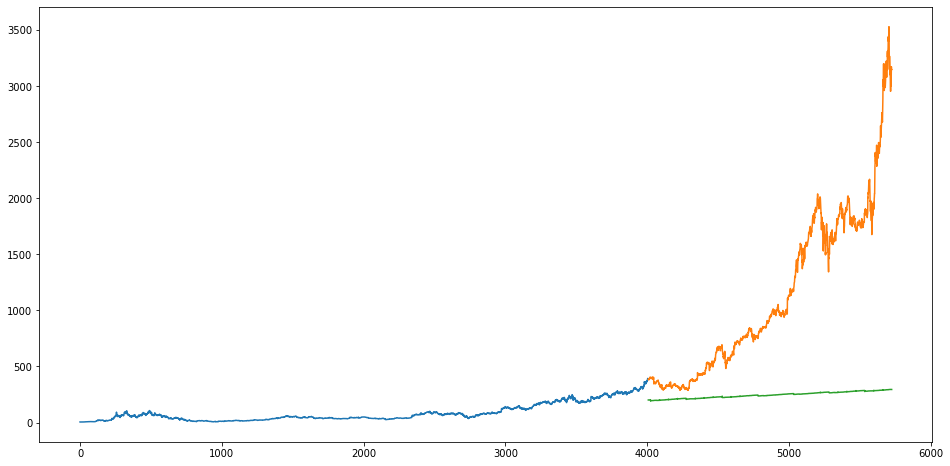

In [ ]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds

valid.index = new_data[split:].index
train.index = new_data[:split].index
plt.figure(figsize=(16,8))
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

## IMPLEMENTATION OF LOGISTIC REGRESSION

In [ ]:
#importing libraries

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [ ]:
#scaling data
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_valid_scaled = scaler.fit_transform(x_valid)
x_valid = pd.DataFrame(x_valid_scaled)

#fit the model and make predictions
model.fit(x_train,y_train.ravel())
preds = model.predict(x_valid)
print(preds)
print('Accuracy of trained model',model.score(x_train,y_train))

[ -7.937892  -7.866667  -7.434242  -7.550668 ... 198.069493 198.501918 198.385492 197.417498]
Accuracy of trained model 0.6429964070955505


In [ ]:
Logisticrms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
Logisticrms

1251.940878216623

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


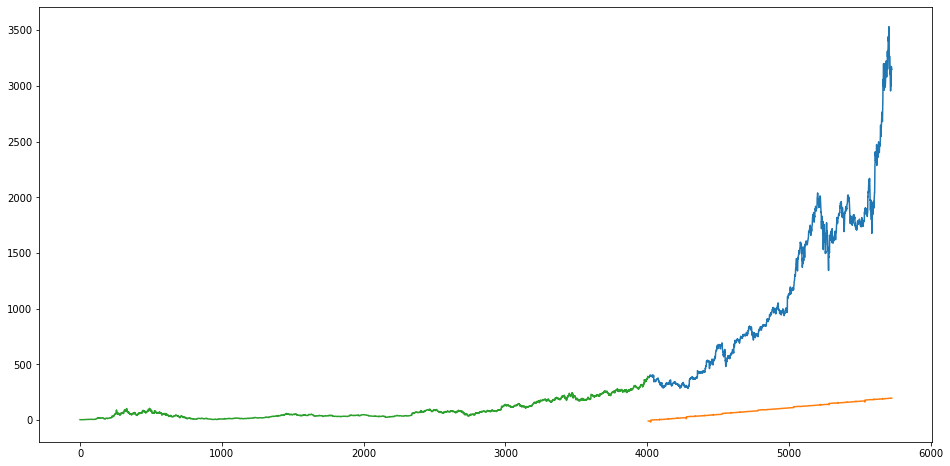

In [ ]:
plt.figure(figsize=(16,8))
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(valid[['Close', 'Predictions']])
plt.plot(train['Close'])

## IMPLEMENTATION OF KNN(K-Nearest-Neighbors)

In [ ]:
#importing libraries
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [ ]:
#scaling data
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_valid_scaled = scaler.fit_transform(x_valid)
x_valid = pd.DataFrame(x_valid_scaled)

#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

#fit the model and make predictions
model.fit(x_train,y_train)
preds = model.predict(x_valid)
print(preds)
print('Accuracy of trained model',model.score(x_train,y_train))

[40.859375 40.544270515441895 41.510416984558105 41.97656297683716 ... 289.3325080871582 288.57500076293945
 288.37500762939453 108.11000061035156]
Accuracy of trained model 0.8971814716781896


In [ ]:
KNNrms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
KNNrms

1252.3142144710937

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


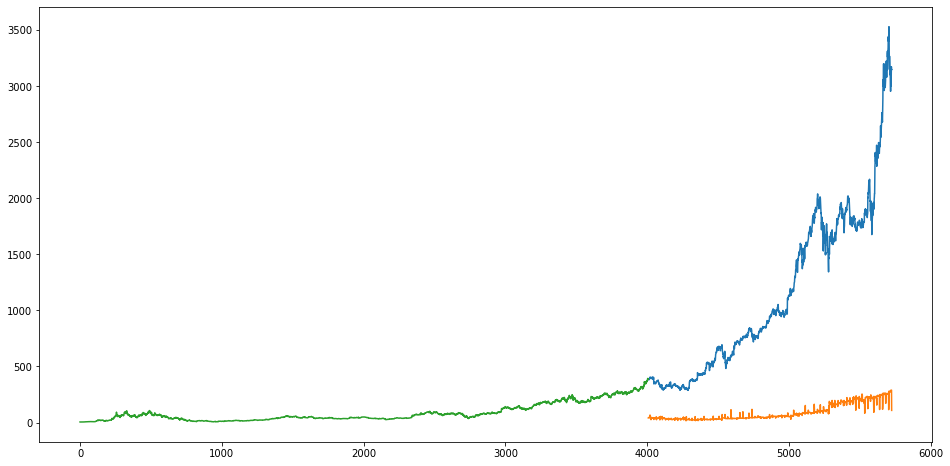

In [ ]:
plt.figure(figsize=(16,8))
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(valid[['Close', 'Predictions']])
plt.plot(train['Close'])

##  IMPLEMENTATION OF LSTM ( Long Term-Short Memory)


In [ ]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

train = dataset[0:split,:]
valid = dataset[split:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=10, batch_size=1, verbose=2)

#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

Epoch 1/10
3947/3947 - 84s - loss: 1.4251e-05
Epoch 2/10
3947/3947 - 81s - loss: 5.8960e-06
Epoch 3/10
3947/3947 - 80s - loss: 4.5582e-06
Epoch 4/10
3947/3947 - 80s - loss: 3.0348e-06
Epoch 5/10
3947/3947 - 81s - loss: 3.3955e-06
Epoch 6/10
3947/3947 - 80s - loss: 3.0535e-06
Epoch 7/10
3947/3947 - 81s - loss: 2.2512e-06
Epoch 8/10
3947/3947 - 83s - loss: 2.2461e-06
Epoch 9/10
3947/3947 - 88s - loss: 2.3423e-06
Epoch 10/10
3947/3947 - 83s - loss: 2.1111e-06


In [ ]:
LSTMrms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
LSTMrms

112.12265607381019

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


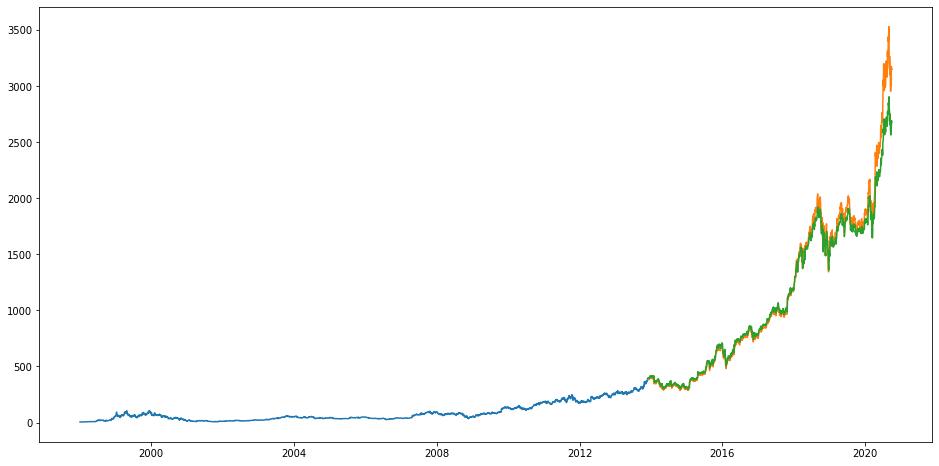

In [ ]:
plt.figure(figsize=(16,8))
train = new_data[:split]
valid = new_data[split:]
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])

## IMPLEMENTATION OF AUTO-ARIMA

In [ ]:
pip install pyramid-arima

In [ ]:
from pyramid.arima import auto_arima

data = df.sort_index(ascending=True, axis=0)

train = data[:split]
valid = data[split:]

training = train['Close']
validation = valid['Close']

model = auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model.fit(training)

forecast = model.predict(n_periods=len(validation))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=19796.566, BIC=19828.029, Fit time=40.276 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=22583.788, BIC=22596.373, Fit time=0.396 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=21392.111, BIC=21417.281, Fit time=7.738 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=19796.725, BIC=19821.896, Fit time=25.918 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=19796.973, BIC=19834.729, Fit time=60.657 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=22587.785, BIC=22612.955, Fit time=2.531 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=19799.348, BIC=19837.103, Fit time=59.133 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=19799.236, BIC=19843.284, Fit time=141.532 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=19795.223, BIC=19832.979, Fit time=43.839 seconds
Fit

In [ ]:
ARIMArms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-np.array(forecast['Prediction'])),2)))
ARIMArms

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(train['Close'])
plt.plot(valid['Close'])
plt.plot(forecast['Prediction'])


# IMPLEMENTATION OF SVR

In [ ]:
train = new_data[:split]
valid = new_data[split:]

x_train = train.drop('Close', axis=1)
y_train = train['Close']
x_valid = valid.drop('Close', axis=1)
y_valid = valid['Close']


In [ ]:
from sklearn.svm import SVR
model = SVR(kernel ='linear',C=1.00)
model.fit(x_train, y_train)
print(model)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [ ]:
#make predictions and find the rmse
preds = model.predict(x_valid)
SVRrms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
SVRrms

1177.9816961401984

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


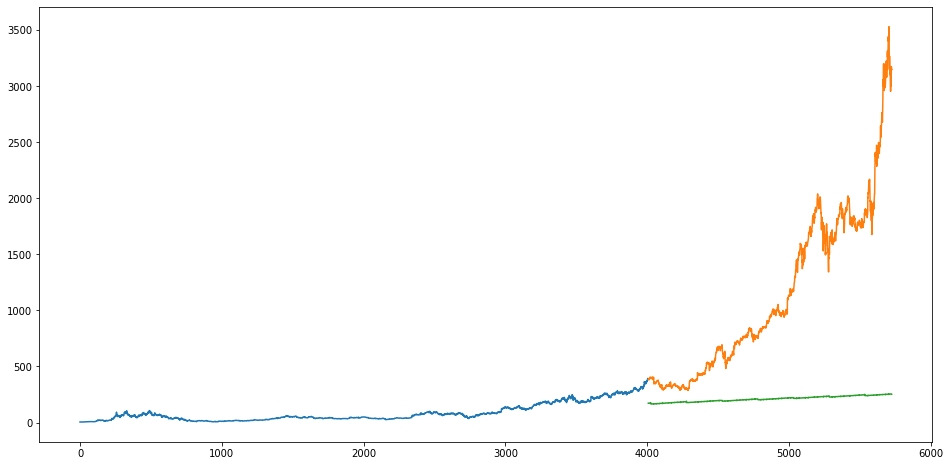

In [ ]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds

valid.index = new_data[split:].index
train.index = new_data[:split].index
plt.figure(figsize=(16,8))
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

# Summary of RMSE scores

In [ ]:
RMSE = {'Model': ['Moving Average','Linear Regression','Logistic Regression','KNN','LSTM','ARIMA','Prophet'],
        'RMSE': [MA_rms,Linearregressionrms,Logisticrms,KNNrms,LSTMrms,ARIMArms,Prophetrms]}

score = pd.DataFrame(RMSE, columns = ['Model', 'RMSE'])
score